In [1]:
import matplotlib.pyplot as plt
import random
import glob
import cv2
import numpy as np
import os
from keras_facenet import FaceNet

# ORL人脸数据库
每个采集对象包含10幅经过归一化处理的灰度图像，图像尺寸均为92×112，图像背景为黑色。其中采集对象的面部表情和细节均有变化，例如笑与不笑、眼睛睁着或闭着以及戴或不戴眼镜等，不同人脸样本的姿态也有变化，其深度旋转和平面旋转可达20度。

共400张图片，共属于40个人的人脸数据。分装在40个文件夹中，文件夹名称为s1到s40，每个文件夹下有10张图片，名称为1.pgm到10.pgm，分辨率大小均为92x112。每个文件夹下的第一张图片（1.pgm）都是被拍摄者的正脸无表情图像，其他9张图片都是有表情和各种姿势的图片。现在有模型embedder = FaceNet()
，可以将一个图片转化为一个特征向量。先将每一个文件夹下的第一张图片进行特征向量转换打上标签（1-40），然后测试40个文件夹剩下的9张图片共360张，逐一生成特征向量，和之前的40个特征向量进行对比，看看和哪个最接近，如果最接近的图片是同一个人，则记录正确，否则错误，最后输出准确率

In [3]:

# 初始化 FaceNet 模型
embedder2 = FaceNet()

# 数据集路径
data_path = './att_faces'  # 替换为实际数值

# 存放特征向量和对应标签
labels = []
features = []

# 处理每个文件夹
for i in range(1, 41):
    folder_path = os.path.join(data_path, f's{i}')
    # 读取正脸无表情图像
    img_path = os.path.join(folder_path, '1.pgm')
    img = cv2.imread(img_path)  # 读取为灰度图像
    img = cv2.resize(img, (160, 160))  # 调整为160x160
    img = np.expand_dims(img, axis=0)  # 添加批次维度   
    embedding = embedder2.embeddings(img)  # 生成特征向量
    features.append(embedding[0])
    labels.append(i)  # 标签从1到40

# 转换成NumPy数组
features = np.array(features)
labels = np.array(labels)

correct_predictions = 0
total_images = 0

# 测试其余的9张图片
for i in range(1, 41):
    folder_path = os.path.join(data_path, f's{i}')
    
    for j in range(2, 11):  # 读取2到10.pgm
        img_path = os.path.join(folder_path, f'{j}.pgm')
        img = cv2.imread(img_path)
        img = cv2.resize(img, (160, 160))  # 调整为160x160
        img = np.expand_dims(img, axis=0)  # 添加批次维度
        embedding = embedder2.embeddings(img)
        # 计算与已经保存的特征的距离
        distances = []
        for ref_embedding in features:
            distance = np.linalg.norm(embedding[0] - ref_embedding)  # 计算L2距离
            distances.append(distance) 

        # 找到最近的特征
        closest_id =distances.index (min(distances))
        print(closest_id+1)
        if closest_id + 1 == i:
            correct_predictions += 1
        total_images += 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━

准确率: 236.11%


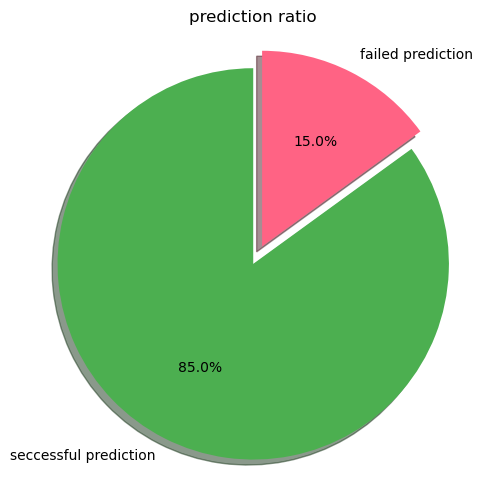

In [ ]:
# 计算准确率
accuracy = correct_predictions / total_images
print(f'准确率: {accuracy:.2%}')

# 计算指标
error_rate = 100 - accuracy

# 数据准备
labels = ['seccessful prediction', 'failed prediction']
sizes = [correct_predictions, total_images - correct_predictions]
colors = ['#4CAF50', '#FF6384']
explode = (0.1, 0)  # 仅“成功预测”分离

# 绘制饼图
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1行2列的第1个图
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # 等比例
plt.title('prediction ratio')


plt.tight_layout()
plt.show()